In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df= pd.read_csv('ncr_ride_bookings.csv')

In [3]:
df.head(5)

Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...                                NaN                       NaN   
1  ...                                NaN                       NaN   
2  ...                                NaN                       NaN   
3  ...                                NaN                       NaN   
4  ...                                NaN                       NaN   

   Driver Cancellation Reason Incomplete Rides  Incomplete Rides Reason  \
0                         NaN              NaN                      NaN   
1                         NaN              1.0        Vehicle Breakdown   
2                         NaN              NaN                      NaN   
3                         NaN              NaN                      NaN   
4                         NaN              NaN                      NaN   

  Booking Value  Ride Distance  Driver Ratings  Customer Rating  \
0           NaN            NaN             NaN              NaN   
1         237.0           5.73             NaN              NaN   
2         627.0          13.58             4.9              4.9   
3         416.0          34.02             4.6              5.0   
4         737.0          48.21             4.1              4.3   

   Payment Method  
0             NaN  
1             UPI  
2      Debit Card  
3             UPI  
4             UPI  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [5]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  139500.000000  102000.000000                      10500.0   
mean        8.456352      29.149636                          1.0   
std         3.773564       8.902577                          0.0   
min         2.000000      10.000000                          1.0   
25%         5.300000      21.600000                          1.0   
50%         8.300000      28.800000                          1.0   
75%        11.300000      36.800000                          1.0   
max        20.000000      45.000000                          1.0   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count                    27000.0            9000.0  102000.000000   
mean                         1.0               1.0     508.295912   
std                          0.0               0.0     395.805774   
min                          1.0               1.0      50.000000   
25%                          1.0               1.0     234.000000   
50%                          1.0               1.0     414.000000   
75%                          1.0               1.0     689.000000   
max                          1.0               1.0    4277.000000   

       Ride Distance  Driver Ratings  Customer Rating  
count  102000.000000    93000.000000     93000.000000  
mean       24.637012        4.230992         4.404584  
std        14.002138        0.436871         0.437819  
min         1.000000        3.000000         3.000000  
25%        12.460000        4.100000         4.200000  
50%        23.720000        4.300000         4.500000  
75%        36.820000        4.600000         4.800000  
max        50.000000        5.000000         5.000000

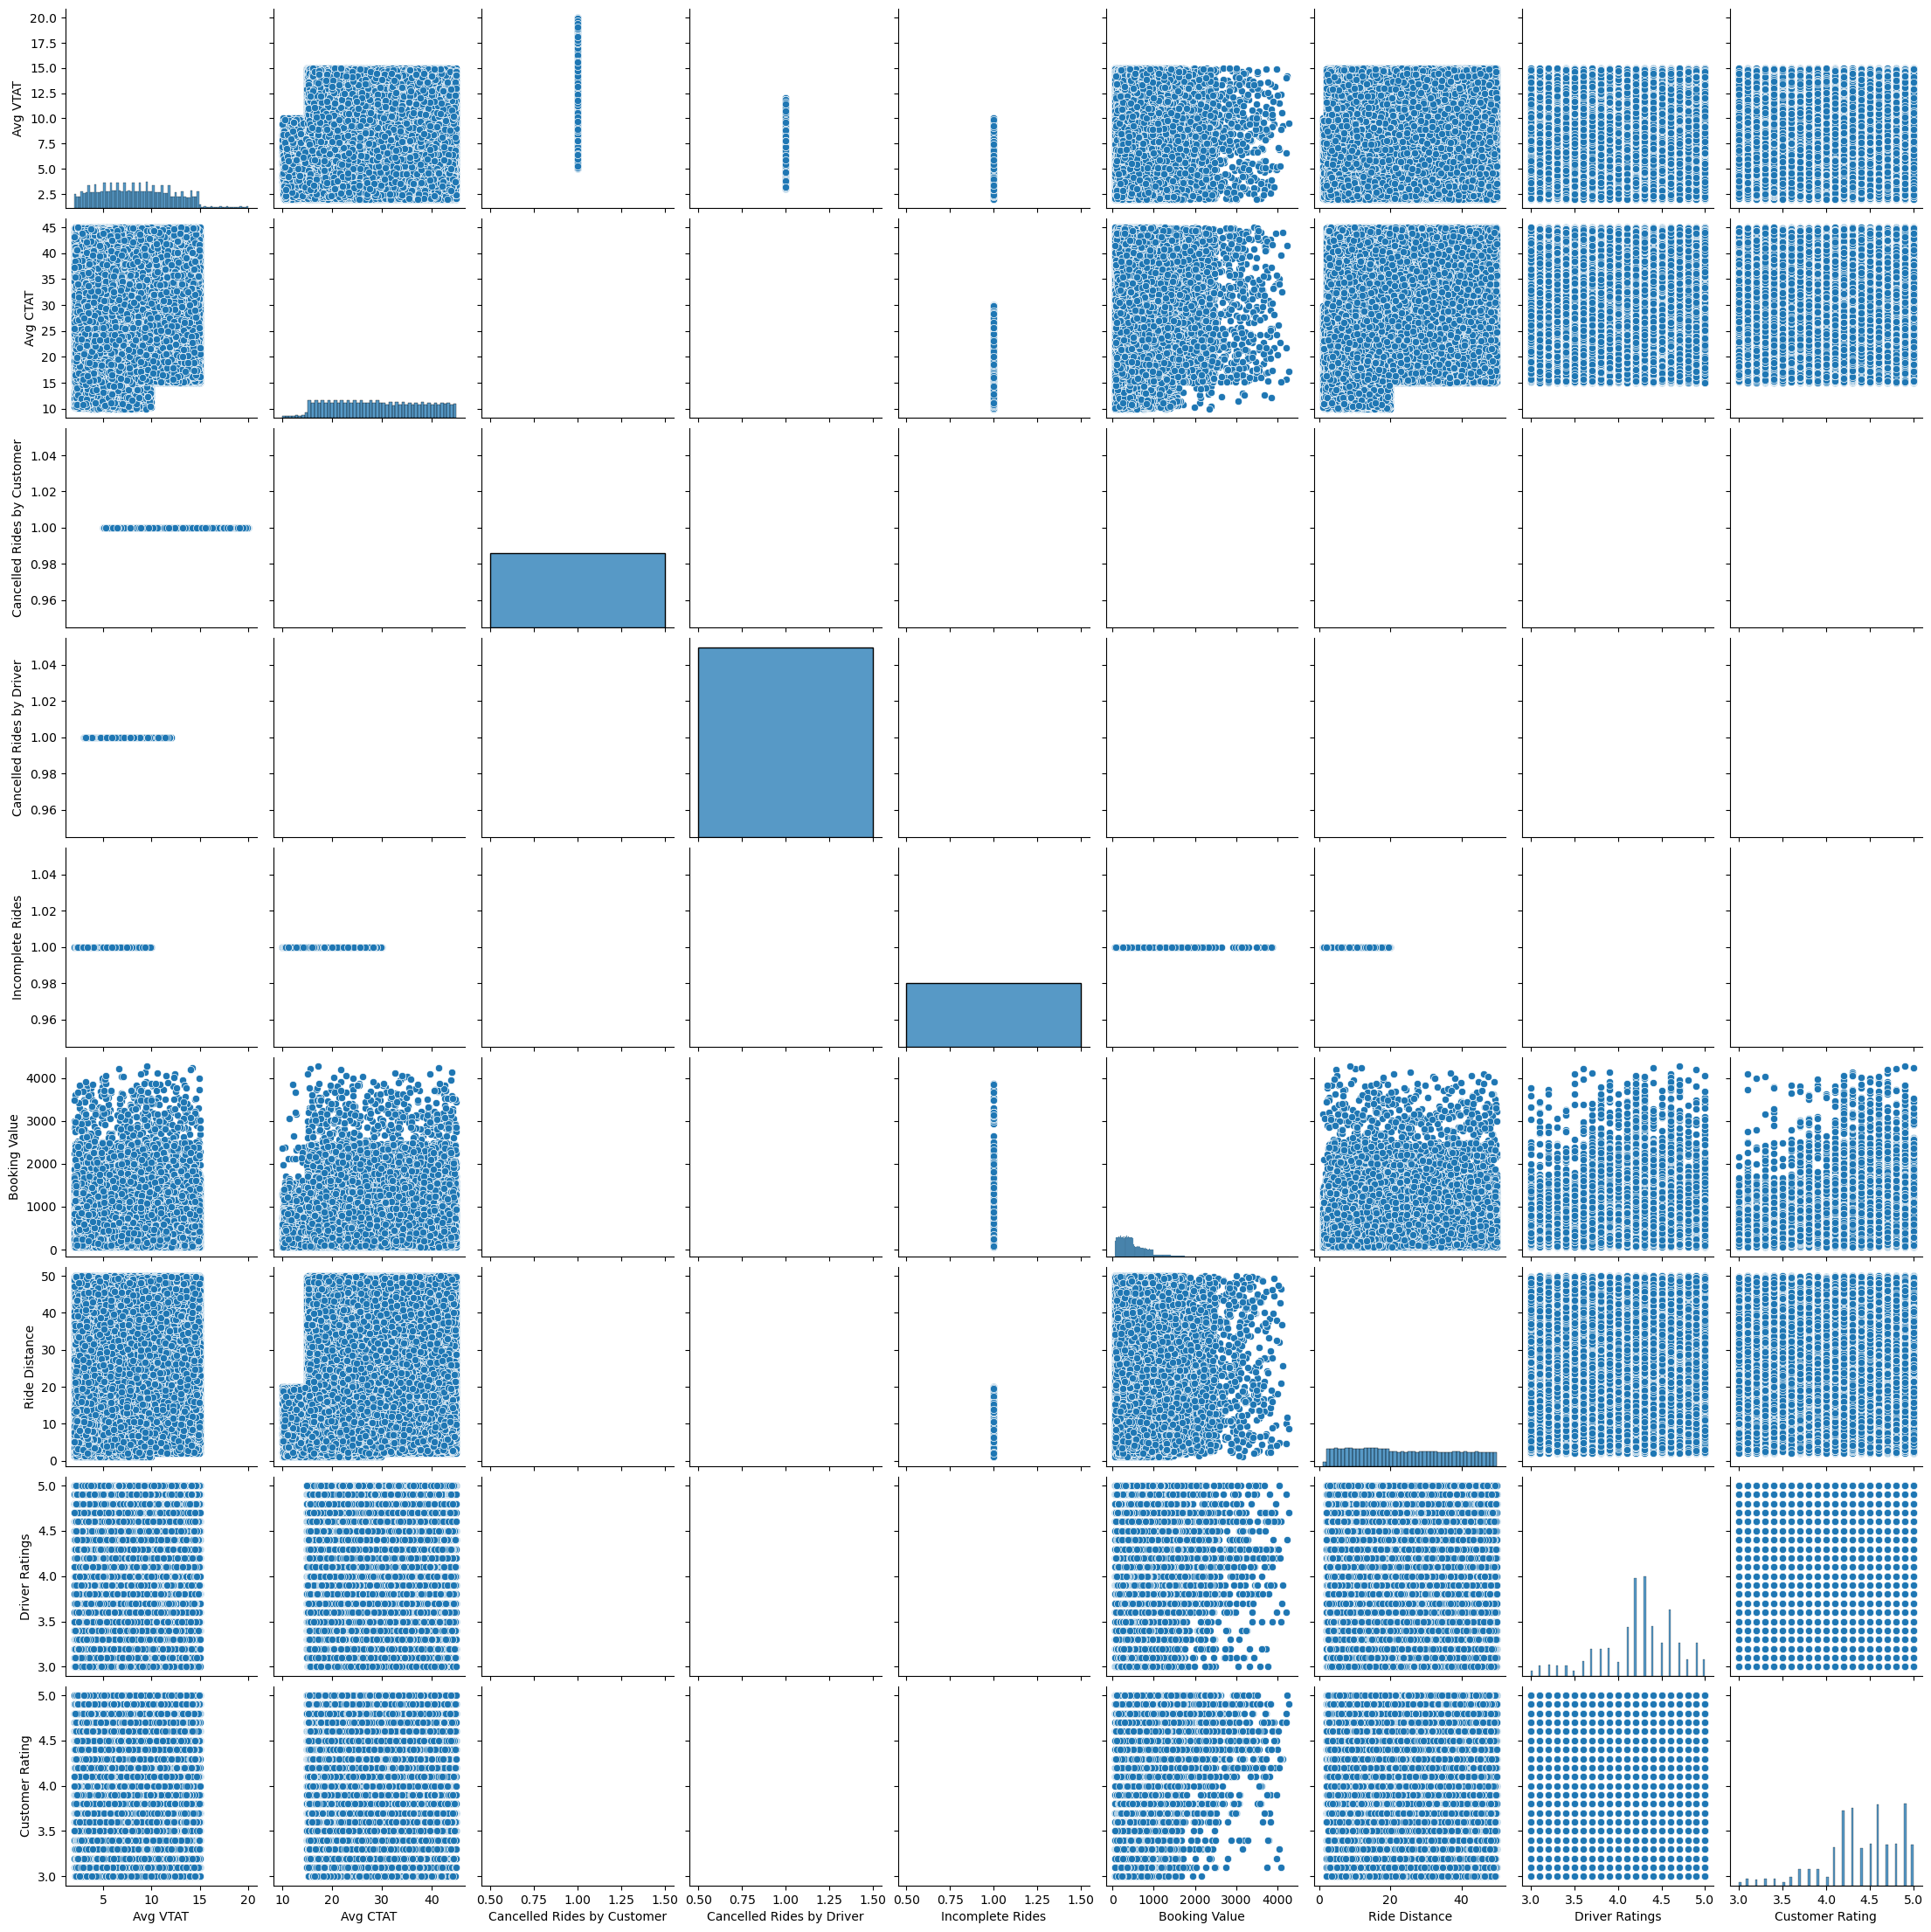

In [6]:
sns.pairplot(df)

<Figure size 1500x800 with 0 Axes>

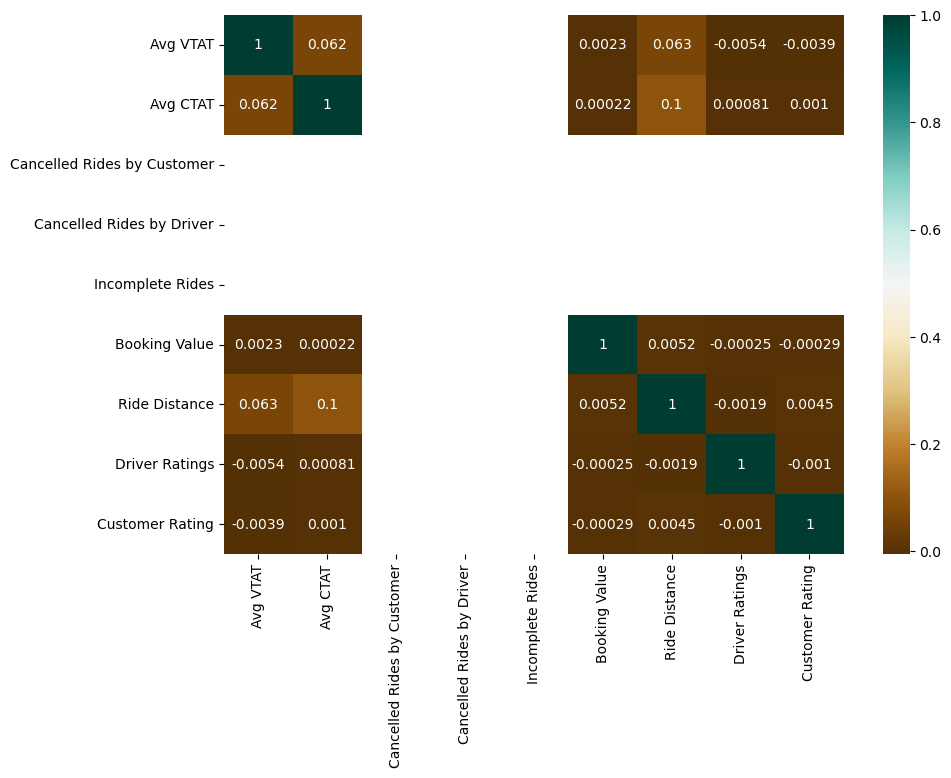

In [7]:
plt.figure(figsize=(15,8))
corrmat = df.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize=(10,7))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BrBG")

In [8]:
# % missing per column
missing = df.isnull().mean().sort_values(ascending=False)*100
print(missing)

Incomplete Rides Reason              94.0
Incomplete Rides                     94.0
Cancelled Rides by Customer          93.0
Reason for cancelling by Customer    93.0
Driver Cancellation Reason           82.0
Cancelled Rides by Driver            82.0
Customer Rating                      38.0
Driver Ratings                       38.0
Ride Distance                        32.0
Booking Value                        32.0
Payment Method                       32.0
Avg CTAT                             32.0
Avg VTAT                              7.0
Time                                  0.0
Drop Location                         0.0
Pickup Location                       0.0
Vehicle Type                          0.0
Customer ID                           0.0
Booking Status                        0.0
Booking ID                            0.0
Date                                  0.0
dtype: float64


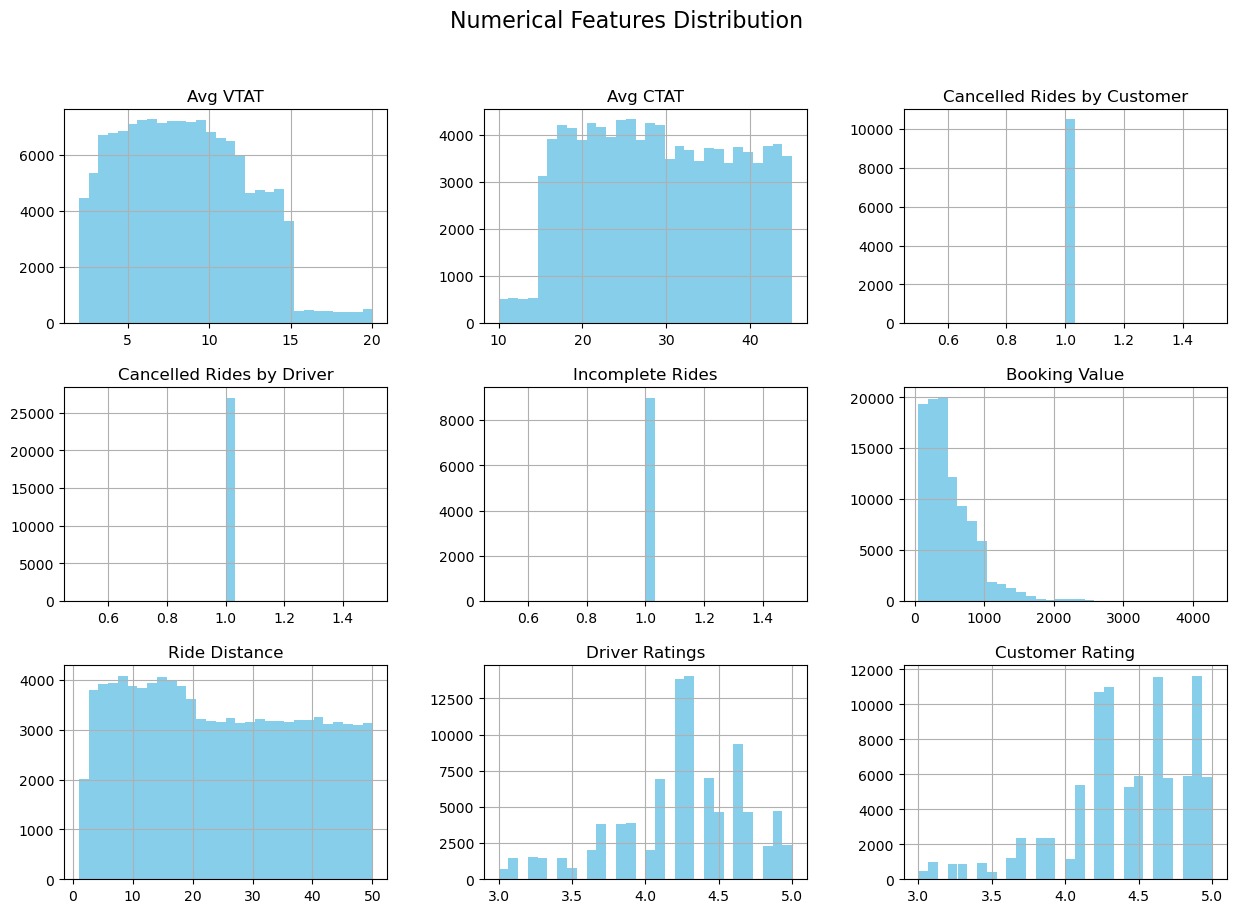

In [9]:
#Numerical Features
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=30, figsize=(15,10), color="skyblue")
plt.suptitle("Numerical Features Distribution", fontsize=16)
plt.show()


#  Booking Trends

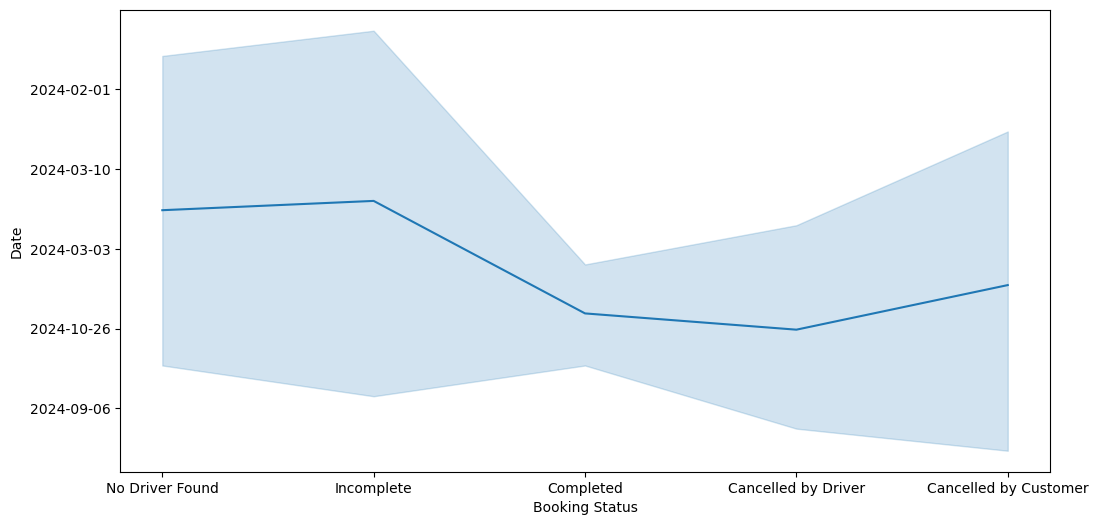

In [10]:
#Date vs Booking Status(daily ride volumes & cancellations)
plt.figure(figsize=(12,6))
sns.lineplot(x='Booking Status', y='Date', data=df)
plt.show()

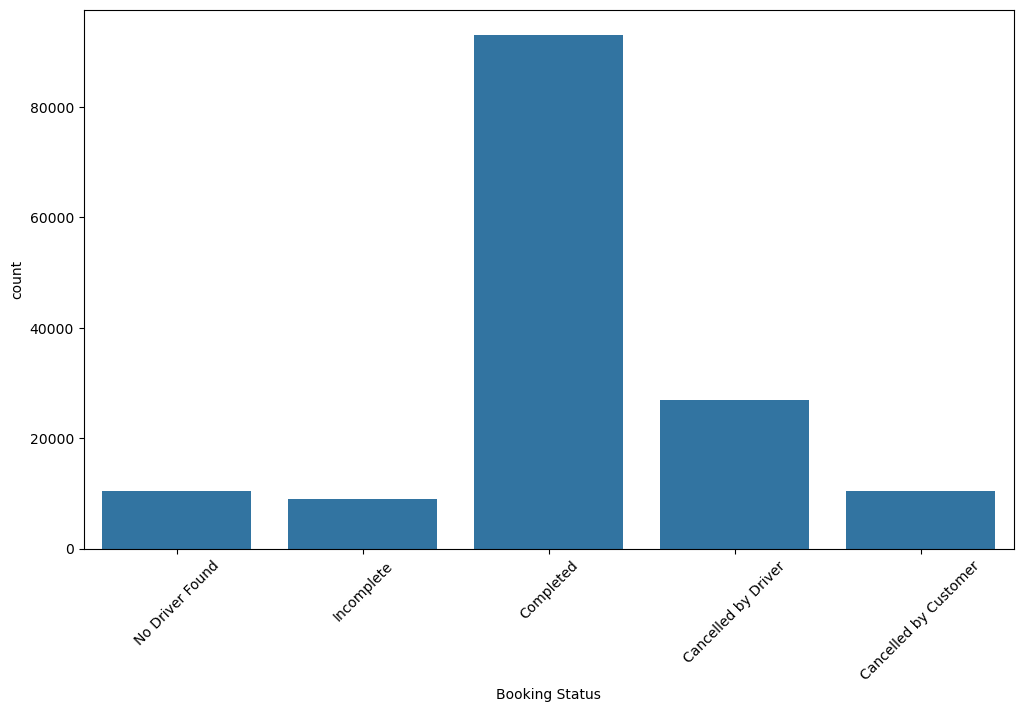

In [11]:
#  Booking status
plt.figure(figsize=(12,7))
sns.countplot(x='Booking Status', data=df)
plt.xticks(rotation=45)
plt.show()


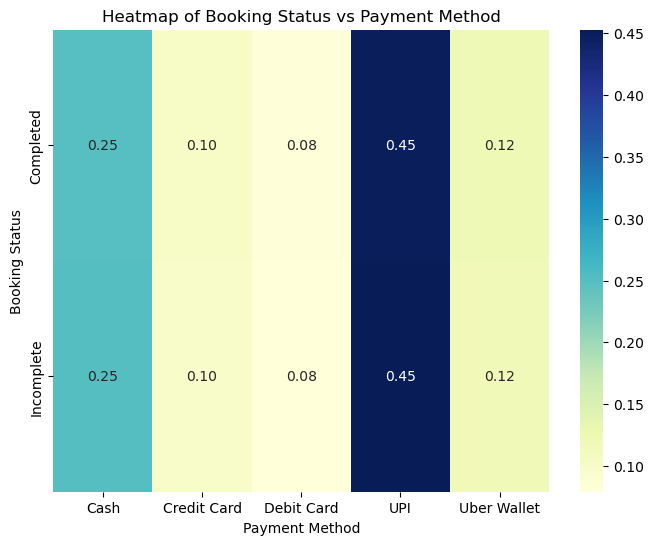

In [12]:
# Crosstab
ct = pd.crosstab(df['Booking Status'], df['Payment Method'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Booking Status vs Payment Method")
plt.show()


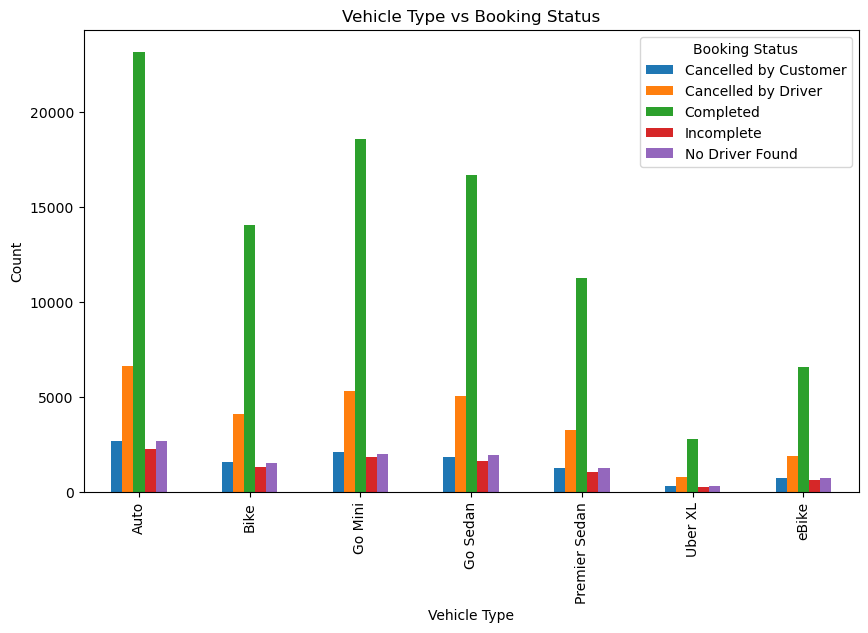

In [13]:
pd.crosstab(df['Vehicle Type'], df['Booking Status']).plot(kind="bar", figsize=(10,6))
plt.title("Vehicle Type vs Booking Status")
plt.ylabel("Count")
plt.show()


#  Cancellations

In [14]:
#Reason for Cancelling by Customer vs Cancelled Rides by Customer → Countplot

plt.figure(figsize=(12,7))
sns.countplot(x='Reason for cancelling by Customer', data=df)
plt.xticks(rotation=45)
plt.show()


In [15]:
#Driver Cancellation Reason vs Cancelled Rides by Driver 


pd.crosstab(df['Driver Cancellation Reason'], df['Cancelled Rides by Driver']).plot(kind="bar", figsize=(10,6))
plt.title("Cancellation Reason vs Cancelled Rides by Driver ")
plt.ylabel("Count")
plt.show()


# Service Quality


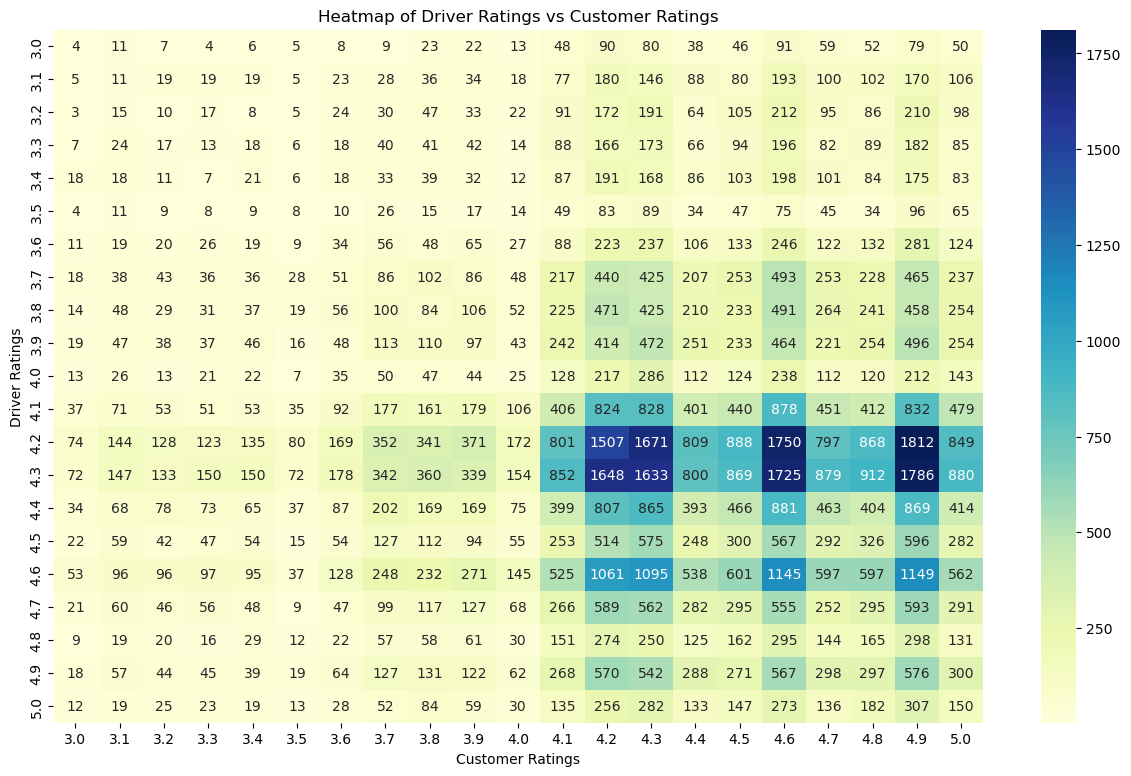

In [16]:
#Driver Ratings vs Customer Ratings → Scatter/heatmap (correlation)

plt.figure(figsize=(15,9))
sns.heatmap(pd.crosstab(df["Driver Ratings"], df["Customer Rating"]), cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap of Driver Ratings vs Customer Ratings")
plt.xlabel("Customer Ratings")
plt.ylabel("Driver Ratings")
plt.show()


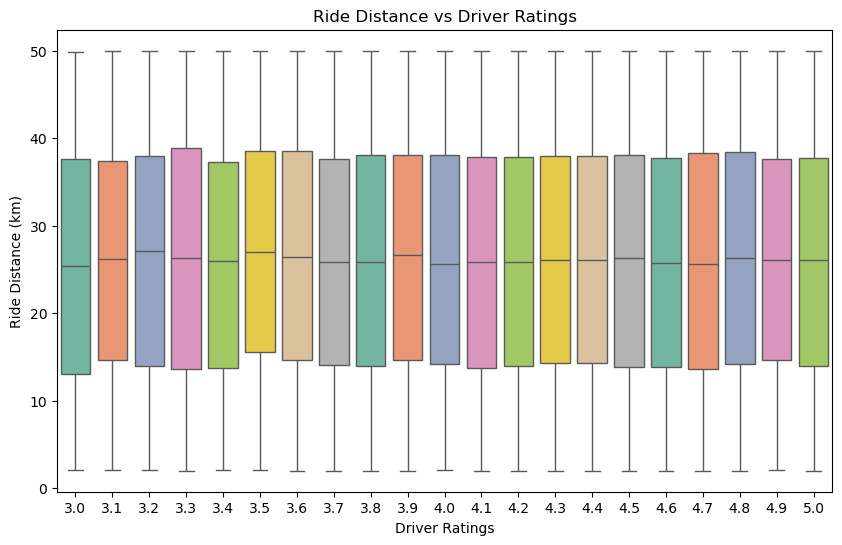

In [17]:
#Ride Distance vs Driver Ratings → Boxplot (do long rides get lower ratings?)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Driver Ratings", y="Ride Distance", palette="Set2")
plt.title("Ride Distance vs Driver Ratings")
plt.xlabel("Driver Ratings")
plt.ylabel("Ride Distance (km)")
plt.show()

In [18]:
corr = df["Ride Distance"].corr(df["Driver Ratings"])
print("Correlation between Ride Distance & Driver Ratings:", round(corr,3))


Correlation between Ride Distance & Driver Ratings: -0.002


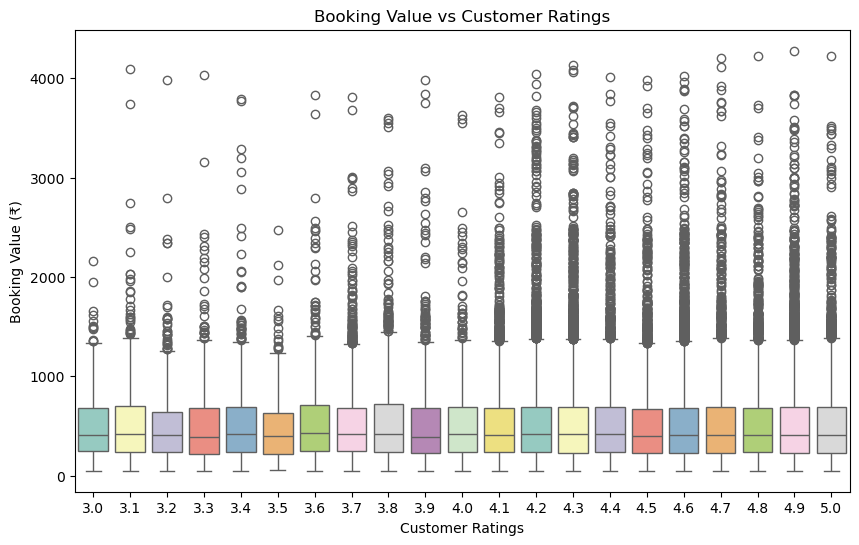

In [19]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Customer Rating", y="Booking Value", palette="Set3")
plt.title("Booking Value vs Customer Ratings")
plt.xlabel("Customer Ratings")
plt.ylabel("Booking Value (₹)")  # change currency label if needed
plt.show()


# Operational Efficiency

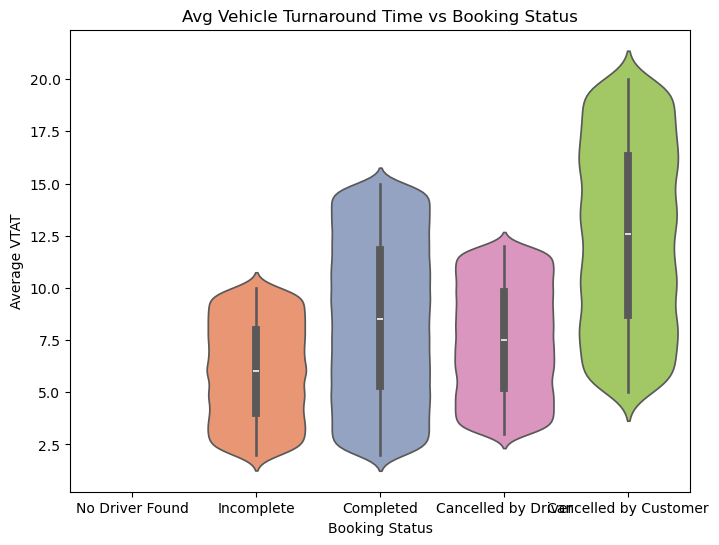

In [20]:
#Avg VTAT (Vehicle Turnaround Time) vs Booking Status 
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x="Booking Status",
    y="Avg VTAT",
    palette="Set2",
    inner="box"   # shows median & IQR inside the violin
)
plt.title("Avg Vehicle Turnaround Time vs Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Average VTAT")
plt.show()

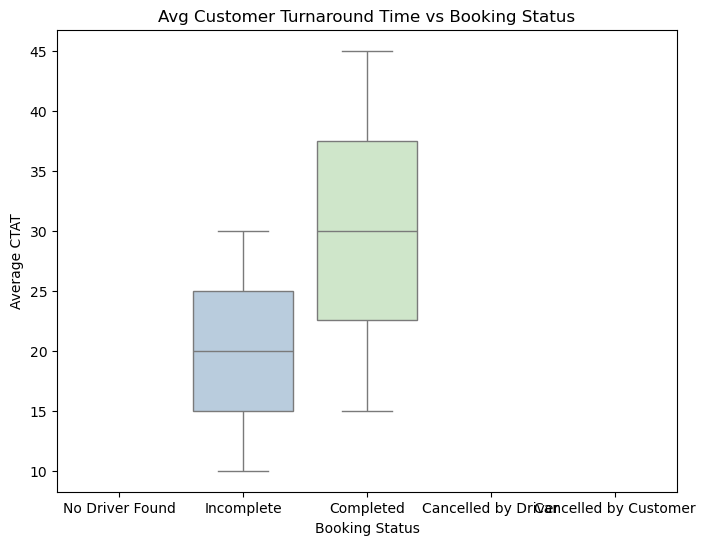

In [21]:
#Avg CTAT (Customer Turnaround Time) vs Booking Status 
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Booking Status",
    y="Avg CTAT",
    palette="Pastel1"
)
plt.title("Avg Customer Turnaround Time vs Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Average CTAT")
plt.show()


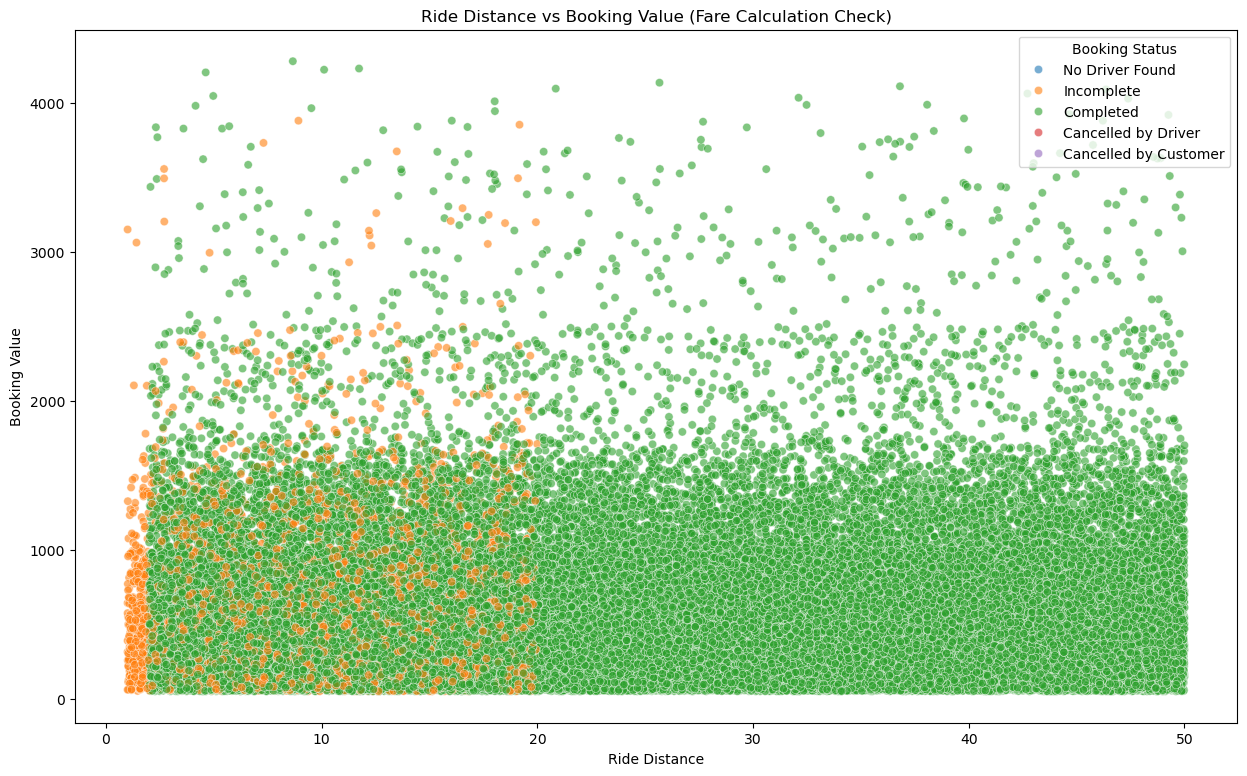

In [22]:
#Ride Distance vs Booking Value (check fare calculation)

plt.figure(figsize=(15,9))
sns.scatterplot(
    data=df,
    x="Ride Distance",
    y="Booking Value",
    hue="Booking Status",   # optional: see if canceled rides differ
    alpha=0.6
)

plt.title("Ride Distance vs Booking Value (Fare Calculation Check)")
plt.xlabel("Ride Distance")
plt.ylabel("Booking Value")
plt.show()


# Payment & Value

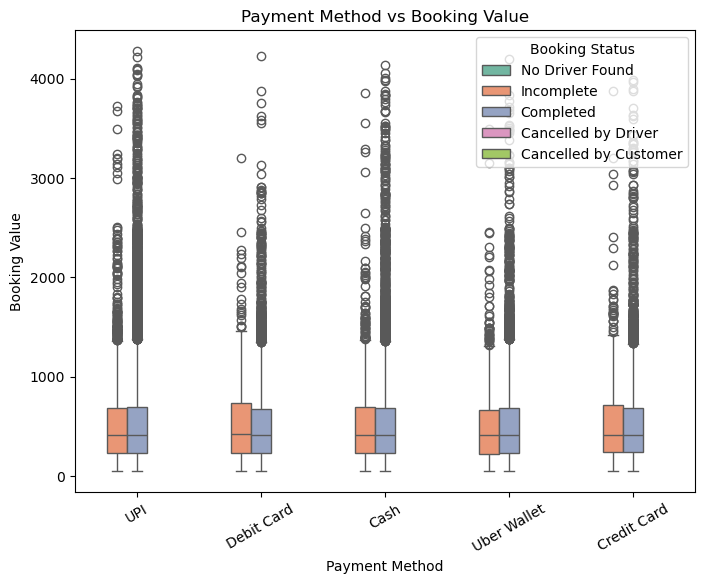

In [23]:
#Payment Method vs Booking Value  (which payment gives higher booking value?)
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Payment Method",
    y="Booking Value",
    hue="Booking Status",   # optional: see if cancellations differ
    palette="Set2"
)
plt.title("Payment Method vs Booking Value")
plt.xlabel("Payment Method")
plt.ylabel("Booking Value")
plt.xticks(rotation=30)
plt.show()


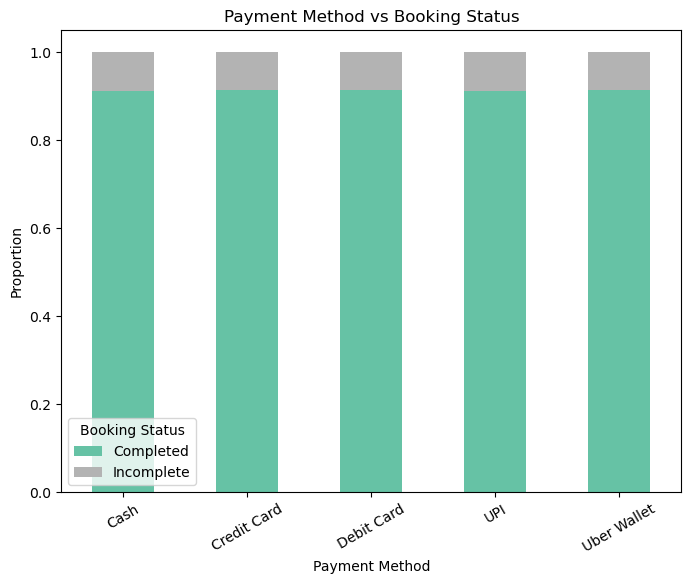

In [24]:
# Crosstab for Payment Method vs Booking Status
ct = pd.crosstab(df['Payment Method'], df['Booking Status'], normalize='index')

# Stacked bar chart
ct.plot(kind="bar", stacked=True, figsize=(8,6), colormap="Set2")
plt.title("Payment Method vs Booking Status")
plt.ylabel("Proportion")
plt.xlabel("Payment Method")
plt.legend(title="Booking Status")
plt.xticks(rotation=30)
plt.show()


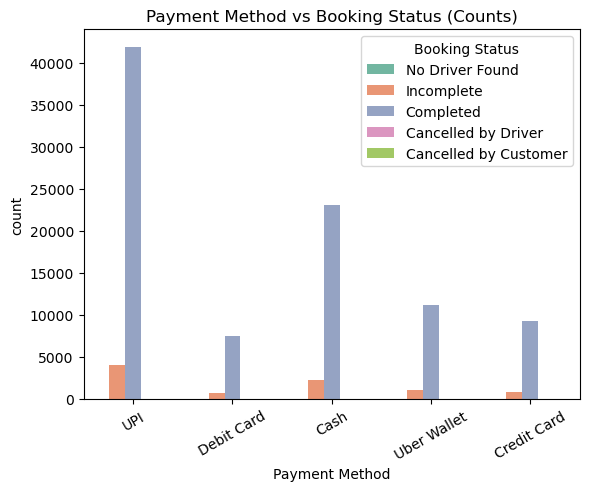

In [25]:
sns.countplot(
    data=df,
    x="Payment Method",
    hue="Booking Status",
    palette="Set2"
)
plt.title("Payment Method vs Booking Status (Counts)")
plt.xticks(rotation=30)
plt.show()


In [26]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Payment Method'], df['Booking Status']))
print("Chi2 Test p-value:", p)


Chi2 Test p-value: 0.9238907932683561


In [29]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# Strip column names to remove extra spaces
df.columns = df.columns.str.strip()

# -------------------------------
# Define target + features
# -------------------------------
target = "Booking Status"
X = df.drop(columns=[target])
y = df[target]

# Encode target
y = LabelEncoder().fit_transform(y)

# Encode categorical features
X = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) 
            if col.dtypes == "object" else col)

# -------------------------------
# Handle Missing Values (NaN)
# -------------------------------
imputer = SimpleImputer(strategy="median")   # numeric -> median
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# -------------------------------
# Train / Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# Define models
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# -------------------------------
# Train + Evaluate
# -------------------------------
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    results[name] = round(acc, 2)

# Show results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy (%)"])
print(results_df)


                 Model  Accuracy (%)
0  Logistic Regression         61.97
1        Decision Tree        100.00
2        Random Forest        100.00
3          Naive Bayes         95.57
4                  SVM         62.00
5                  KNN         52.37
6              XGBoost        100.00
